In [21]:
from biosppy.signals import emg
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('EMG-data.csv')


In [3]:
Df = df[df.label==1].copy()
Df.rename(columns={'class': 'group'},inplace = True)

In [4]:
Df = Df[Df.group ==1 ]
Df

time  channel1  channel2  channel3  channel4  channel5  channel6  \
2287    2400  -0.00001   0.00000  -0.00001   0.00000   0.00000  -0.00001   
2288    2401  -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001   
2289    2402  -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001   
2290    2403  -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001   
2291    2404  -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001   
...      ...       ...       ...       ...       ...       ...       ...   
94903  33183  -0.00001  -0.00001  -0.00003  -0.00001   0.00000   0.00001   
94904  33184  -0.00001  -0.00001  -0.00003  -0.00001   0.00000   0.00001   
94905  33185  -0.00001  -0.00001  -0.00003  -0.00001   0.00000   0.00001   
94906  33186  -0.00001  -0.00001  -0.00003  -0.00001   0.00000   0.00001   
94907  33189   0.00001   0.00003   0.00004   0.00006   0.00002   0.00002   

       channel7  channel8  group  label  
2287   -0.00001   0.00001      1      1  
2288   -0.00003  -0.00002      1      1  
2289   -0.00003  -0.00002      1      1  
2290   -0.00003  -0.00002      1      1  
2291   -0.00003  -0.00002      1      1  
...         ...       ...    ...    ...  
94903  -0.00001   0.00000      1      1  
94904  -0.00001   0.00000      1      1  
94905  -0.00001   0.00000      1      1  
94906  -0.00001   0.00000      1      1  
94907  -0.00001   0.00002      1      1  

[7311 rows x 11 columns]

In [26]:
emgs = Df['channel1'].values
time = Df['time'].values

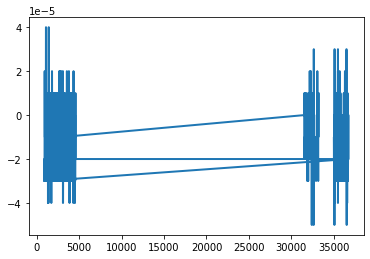

In [6]:
pl.plot(time, signal, lw = 2)

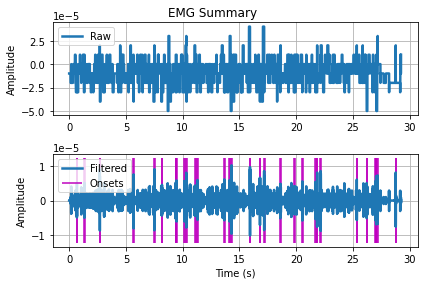

ReturnTuple(ts=array([0.00000000e+00, 3.99945288e-03, 7.99890576e-03, ...,
       2.92280016e+01, 2.92320011e+01, 2.92360005e+01]), filtered=array([-2.04167909e-11, -4.22525321e-10,  9.14334500e-10, ...,
        9.02090026e-07, -5.86328579e-07,  2.75874764e-08]), onsets=array([ 172,  174,  336,  338,  670,  683, 1415, 1427, 1872, 1886, 2046,
       2052, 2343, 2350, 2363, 2372, 2537, 2545, 2576, 2596, 2777, 2783,
       2824, 2832, 3414, 3422, 3531, 3540, 3572, 3587, 3978, 3992, 4199,
       4209, 4290, 4303, 4650, 4657, 4961, 4968, 5132, 5141, 5420, 5427,
       5458, 5470, 5536, 5549, 6333, 6341, 6552, 6556, 6745, 6754, 6758,
       6770, 6789, 6802, 7189, 7201]))

In [7]:
emg.emg(signal,sampling_rate=250)

In [10]:
import pysiology.electromyography as emg

In [12]:
e = emg.analyzeEMG(signal,200,preprocessing=True, lowpass = 50, highpass= 20)

In [13]:
e

{'TimeDomain': {'IEMG': 0.013015046235221709,
  'MAV': 1.7802005519384093e-06,
  'MAV1': 1.3964787313540188e-06,
  'MAV2': 1.068880955398205e-06,
  'SSI': 8.867728206731184e-08,
  'VAR': 1.2130955139167146e-11,
  'TM3': 4.522139246088359e-18,
  'TM4': 1.8474358331466377e-21,
  'TM5': 2.5389003332054745e-27,
  'LOG': 1.0000017802021366,
  'RMS': 3.4827138649000496e-06,
  'WL': 0.01135121873928209,
  'AAC': 1.5526219038821079e-06,
  'DASDV': 1.0149704050284438e-11,
  'AFB': 0.04666513293710752,
  'ZC': 0,
  'MYOP': 0.0,
  'WAMP': 0,
  'SSC': 0,
  'MAVSLPk': [1.9400784023832046e-06,
   1.9234661574557544e-06,
   1.4770570959762679e-06],
  'HIST': {1: {'ZC': 0, 'WAMP': 0},
   2: {'ZC': 0, 'WAMP': 0},
   3: {'ZC': 0, 'WAMP': 0},
   4: {'ZC': 0, 'WAMP': 0},
   5: {'ZC': 0, 'WAMP': 0},
   6: {'ZC': 0, 'WAMP': 0},
   7: {'ZC': 0, 'WAMP': 0},
   8: {'ZC': 0, 'WAMP': 0},
   9: {'ZC': 0, 'WAMP': 0}}},
 'FrequencyDomain': {'MNF': 28.303974054309563,
  'MDF': 26.5625,
  'PeakFrequency': 23.4375,
  

In [15]:
import scipy as sp
from scipy import signal

In [58]:
def filteremg(time, emg, low_pass=5, sfreq=1000, high_band=20, low_band=450):
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    b1,a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    emg_filtered = sp.signal.filtfilt(b1,a1,emg)
    emg_rectified = abs(emg_filtered)
    low_pass = low_pass/(sfreq/2)
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    return emg_envelope

In [59]:
emx = filteremg(time, emgs)

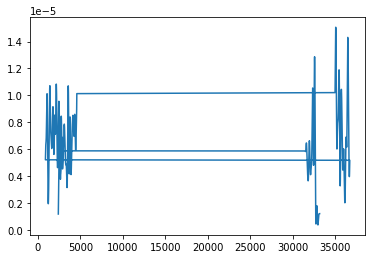

In [60]:
plt.plot(time,emx)